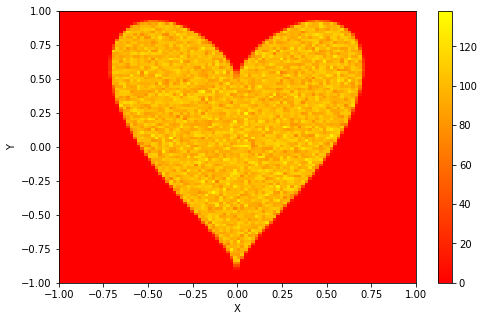

In [1]:
# namedhist-descartes.py

import boost_histogram as bh
import hist
import numpy as np
import matplotlib.pyplot as plt


h = hist.NamedHist(
    hist.axis.Regular(100, -1, 1, name="X"),
    hist.axis.Regular(100, -1, 1, name="Y"),
    hist.axis.Bool(name="V"),
)

x, y = np.random.random_sample([2, 1_000_000])*2 - 1
valid = np.abs(x)**2 + (y + .2 - np.power(np.abs(x), 2/3))**2 < .5
h.fill(Y=y, X=x, V=valid)

valid_only = h[:, :, bh.loc(True)]

fig, ax = plt.subplots(figsize=(8,5))
W, X, Y = valid_only.to_numpy()
mesh = ax.pcolormesh(X, Y, W.T, cmap='autumn')
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.colorbar(mesh)
fig.show()

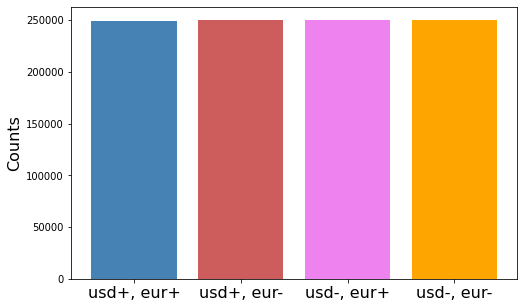

In [2]:
# namedhist-coingames.py

import hist
import numpy as np
import matplotlib.pyplot as plt

h = hist.NamedHist(
    hist.axis.Bool(name='USD', title='usd font'),
    hist.axis.Bool(name='EUR', title='eur font')
)
usd = np.random.rand(1_000_000) > 0.5
eur = np.random.rand(1_000_000) > 0.5

h.fill(USD=usd, EUR=eur)

bar = [h[0, 0], h[0, 1], h[1, 0], h[1, 1]]
x = range(len(bar))
bar_color = ['steelblue', 'indianred', 'violet', 'orange']
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x, bar, color=bar_color)
plt.xticks(x, ("usd+, eur+", "usd+, eur-", "usd-, eur+",\
                                    "usd-, eur-"), size=16)
plt.ylabel("Counts", size=16)
fig.show()

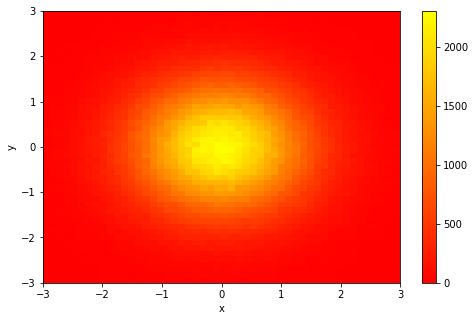

In [3]:
# namedhist-simple.py

import boost_histogram as bh
import hist
import numpy as np
import matplotlib.pyplot as plt


h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="x"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000)
y = np.random.randn(1_000_000)
h.fill(y=y, x=x)

fig, ax = plt.subplots(figsize=(8,5))
w, x, y = h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(mesh)
fig.show()

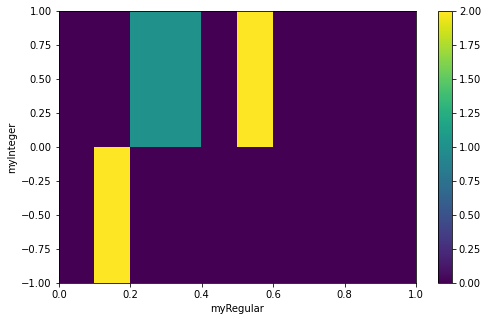

In [4]:
# axes-name.py

import hist
import numpy as np
import matplotlib.pyplot as plt

h = hist.NamedHist(
    hist.axis.Regular(10, 0, 1, name='myRegular'),
    hist.axis.Integer(-1, 1, name='myInteger')
)

regular = [.15, .15, .25, .35, .55, .55]
integer = [-1, -1, 0, 0, 0, 0]

h.fill(myRegular=regular, myInteger=integer)

fig, ax = plt.subplots(figsize=(8,5))
w, x, y = h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T)
ax.set_xlabel(h.axes[0].metadata["name"])
ax.set_ylabel(h.axes[1].metadata["name"])
fig.colorbar(mesh)
fig.show()

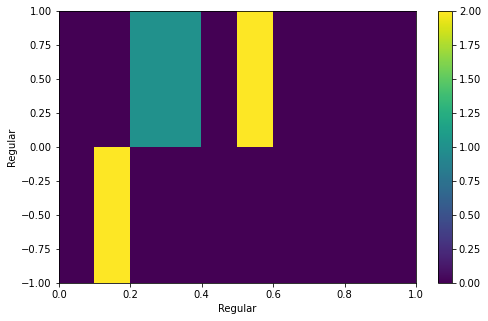

In [5]:
# axes-title.py

import hist
import numpy as np
import matplotlib.pyplot as plt

h = hist.NamedHist(
    hist.axis.Regular(10, 0, 1, name='myRegular', title='Regular'),
    hist.axis.Integer(-1, 1, name='myInteger', title='Regular')
)

regular = [.15, .15, .25, .35, .55, .55]
integer = [-1, -1, 0, 0, 0, 0]

h.fill(myRegular=regular, myInteger=integer)

fig, ax = plt.subplots(figsize=(8,5))
w, x, y = h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T)
ax.set_xlabel(h.axes[0].title)
ax.set_ylabel(h.axes[1].title)
fig.colorbar(mesh)
fig.show()

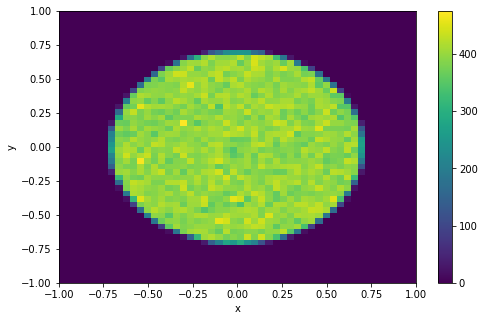

In [6]:
# axes-bool-1.py

import boost_histogram as bh
import numpy as np
import matplotlib.pyplot as plt

h = bh.Histogram(
    bh.axis.Regular(50, -1, 1),
    bh.axis.Regular(50, -1, 1),
    bh.axis.Integer(0, 2, underflow=False, overflow=False),
)

x, y = np.random.random_sample([2, 1_000_000])*2 - 1
valid = (x**2 + y**2) < .5

h.fill(x, y, valid)
valid_only = h[:, :, bh.loc(True)]

fig, ax = plt.subplots(figsize=(8,5))
W, X, Y = valid_only.to_numpy()
mesh = ax.pcolormesh(X, Y, W.T)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(mesh)
fig.show()

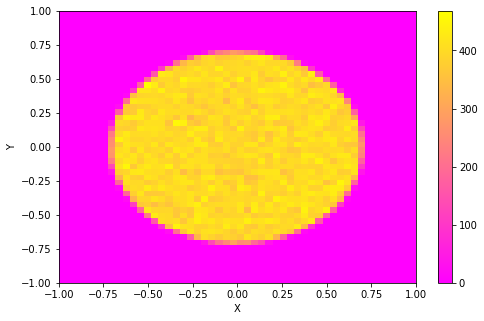

In [7]:
# axes-bool-2.py

import boost_histogram as bh
import hist
import numpy as np
import matplotlib.pyplot as plt


h = hist.NamedHist(
    hist.axis.Regular(50, -1, 1, name="X"),
    hist.axis.Regular(50, -1, 1, name="Y"),
    hist.axis.Bool(name="V"),
)

x, y = np.random.random_sample([2, 1_000_000])*2 - 1
valid = (x**2 + y**2) < .5
h.fill(Y=y, X=x, V=valid)

valid_only = h[:, :, bh.loc(True)]

fig, ax = plt.subplots(figsize=(8,5))
W, X, Y = valid_only.to_numpy()
mesh = ax.pcolormesh(X, Y, W.T, cmap='spring')
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.colorbar(mesh)
fig.show()

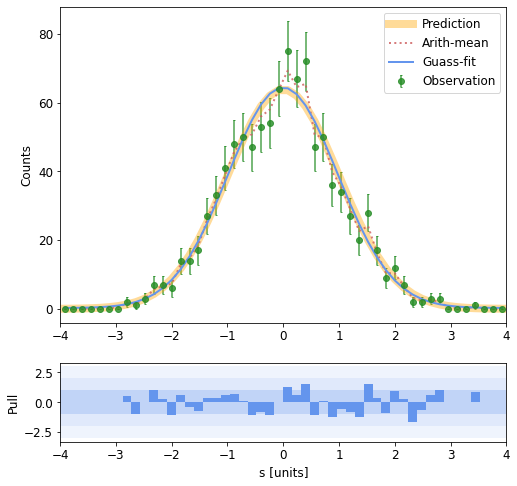

In [8]:
# hist-simple.py

import hist
import numpy as np
import matplotlib.pyplot as plt


def pdf(x, a=1/np.sqrt(2*np.pi), x0=0, sigma=1, offset=0):
    return a * np.exp(-(x-x0)**2/(2*sigma**2)) + offset


h = hist.Hist(
    hist.axis.Regular(50, -4, 4, name="S", title="s [units]", underflow=False, overflow=False)
)

data = np.random.normal(size=1_000)

h.fill(data)

fig, ax, pull_ax = h.pull_plot(pdf, size='m', theme='Chrome')

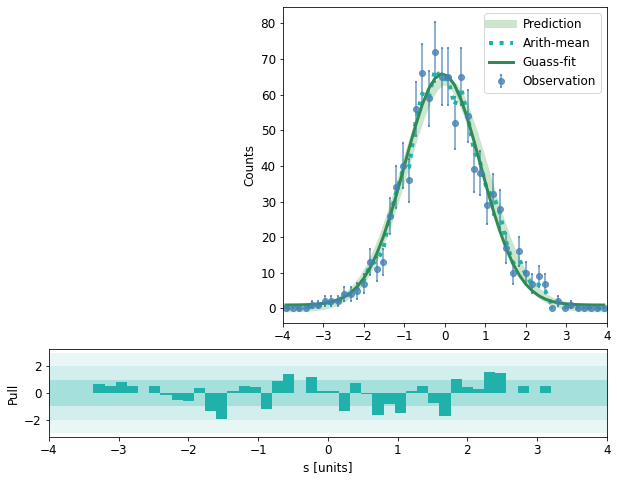

In [9]:
# hist-cusfig.py

import hist
import numpy as np
import matplotlib.pyplot as plt


def pdf(x, a=1/np.sqrt(2*np.pi), x0=0, sigma=1, offset=0):
    return a * np.exp(-(x-x0)**2/(2*sigma**2)) + offset


h = hist.Hist(
    hist.axis.Regular(50, -4, 4, name="S", title="s [units]", underflow=False, overflow=False)
)

data = np.random.normal(size=1_000)

h.fill(data)

fig = plt.figure(figsize=(10, 10))
grid = fig.add_gridspec(5, 5, wspace=0.3, hspace=0.3)
ax = fig.add_subplot(grid[0:3, 2:])
pull_ax = fig.add_subplot(grid[3:4, :], sharex=ax)

h.pull_plot(pdf, size="m", fig=fig, ax=ax, pull_ax=pull_ax, theme='winter')
fig.savefig("img/ax-img.png")


(<Figure size 576x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1272ada10>)

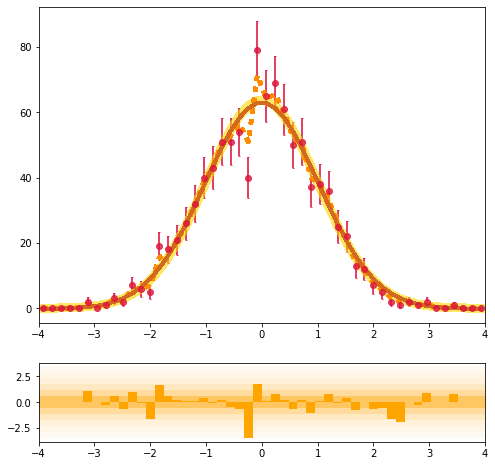

In [10]:
# hist-pro.py

import hist
import numpy as np
import matplotlib.pyplot as plt

def pdf(x, a=1/np.sqrt(2*np.pi), x0=0, sigma=1, offset=0):
    return a * np.exp(-(x-x0)**2/(2*sigma**2)) + offset

h = hist.Hist(
    hist.axis.Regular(50, -4, 4, name="S", title="s [units]", underflow=False, overflow=False)
)

data = np.random.normal(size=1_000)
h.fill(data)

h.pull_plot_pro(pdf, eb_ecolor='crimson', eb_mfc='crimson', eb_mec='crimson', eb_fmt='o', eb_ms=6,\
                eb_capsize=1, eb_capthick=2, eb_alpha=.8, vp_c='gold', vp_ls='-', vp_lw=8,\
                vp_alpha=.6, mp_c='darkorange', mp_ls=':', mp_lw=4, mp_alpha=1.,\
                fp_c='chocolate', fp_ls='-', fp_lw=3, fp_alpha=1., bar_fc='orange',\
                pp_num=6, pp_fc='orange', pp_alpha=.618, pp_ec=None)

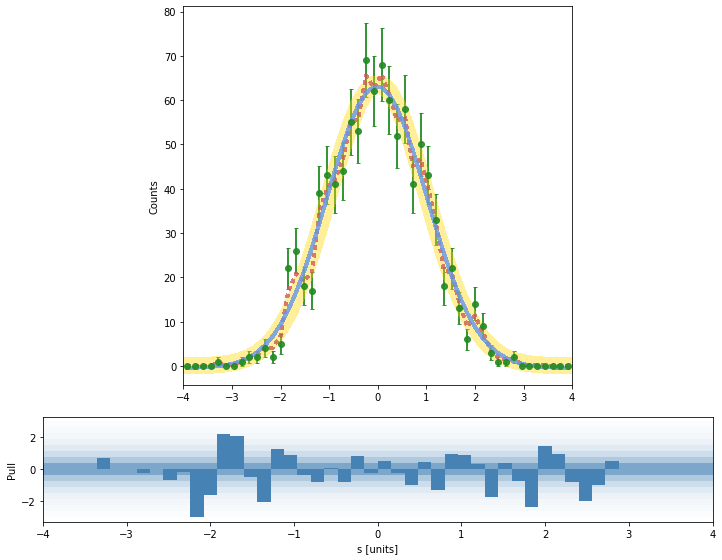

In [13]:
# hist-cusfig-pro.py

import hist
import numpy as np
import matplotlib.pyplot as plt

def pdf(x, a=1/np.sqrt(2*np.pi), x0=0, sigma=1, offset=0):
    return a * np.exp(-(x-x0)**2/(2*sigma**2)) + offset

h = hist.Hist(
    hist.axis.Regular(50, -4, 4, name="S", title="s [units]", underflow=False, overflow=False)
)

data = np.random.normal(size=1_000)
h.fill(data)

fig = plt.figure(figsize=(12, 12))
grid = fig.add_gridspec(5, 5, wspace=0.3, hspace=0.3)
ax = fig.add_subplot(grid[0:3, 1:4])
pull_ax = fig.add_subplot(grid[3:4, :], sharex=ax)

fig, ax, pull_ax = h.pull_plot_pro(pdf, fig=fig, ax=ax, pull_ax=pull_ax, bar_fc='steelblue',\
                pp_fc='steelblue', pp_num=8, pp_alpha=.7)

ax.set_ylabel("Counts")
pull_ax.set_xlabel(h.axes[0].title)
pull_ax.set_ylabel("Pull")

fig.savefig("img/ax-img-pro.png")